# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


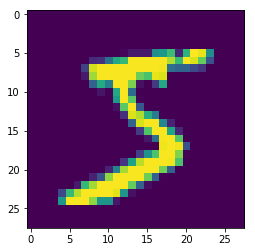

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
model = Sequential()

#Layer 1
model.add(Convolution2D(8,3,3,input_shape=(28,28,1)))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))

model.add(Convolution2D(16,3,3))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))

model.add(Convolution2D(32,3,3))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2 ,2)))

#Layer 2
model.add(Convolution2D(16,3,3))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))

model.add(Convolution2D(32,3,3))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2 ,2)))

#Layer 3
model.add(Convolution2D(32,3,3))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))



model.add(Convolution2D(10,1,1))
model.add(BatchNormalization(axis=3))


model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.4020 - acc: 0.9214
Epoch 2/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.1440 - acc: 0.9696
Epoch 3/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.0944 - acc: 0.9785
Epoch 4/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0733 - acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.0592 - acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.0531 - acc: 0.9867
Epoch 7/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0462 - acc: 0.9876
Epoch 8/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.0415 - acc: 0.9889
Epoch 9/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.0383 - acc: 0.9894
Epoch 10/10
60000/60000 [==============================] - 23s 377us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score)

[0.023490235864371063, 0.9943]


In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[4.2710753e-06 7.5439057e-06 1.2000899e-06 1.9670459e-05 6.2342283e-06
  2.2392423e-06 1.2170208e-06 9.9995208e-01 4.5971124e-06 1.0643924e-06]
 [4.1289008e-04 4.5234439e-05 9.9933714e-01 1.5030330e-05 1.4986060e-05
  1.2429324e-06 1.1962984e-04 3.9683458e-05 1.2569501e-05 1.5353481e-06]
 [1.8633313e-05 9.9989378e-01 6.6923185e-06 2.8376935e-05 9.5882142e-06
  9.6372696e-06 2.5592552e-05 5.1463612e-06 1.0325036e-06 1.6116202e-06]
 [9.9972564e-01 8.1024191e-05 3.1328123e-05 2.2392256e-05 1.6387010e-05
  1.2930287e-05 3.8253304e-05 1.0625122e-05 3.1724448e-05 2.9601162e-05]
 [1.8393741e-05 8.3268307e-05 9.3838003e-07 2.9876310e-06 9.9968302e-01
  1.7043014e-07 5.0399936e-05 1.3884339e-05 1.2913110e-05 1.3413528e-04]
 [4.3496606e-05 9.9984932e-01 1.6052405e-05 2.5008700e-05 1.7687480e-05
  4.9607197e-06 2.9201852e-05 7.9458423e-06 2.4046262e-06 3.9648303e-06]
 [4.1547814e-06 4.8174625e-04 2.7131158e-05 3.9823040e-06 9.9857712e-01
  2.0130059e-05 7.3410920e-05 1.3479760e-05 1.3054501e-04 

In [0]:

layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

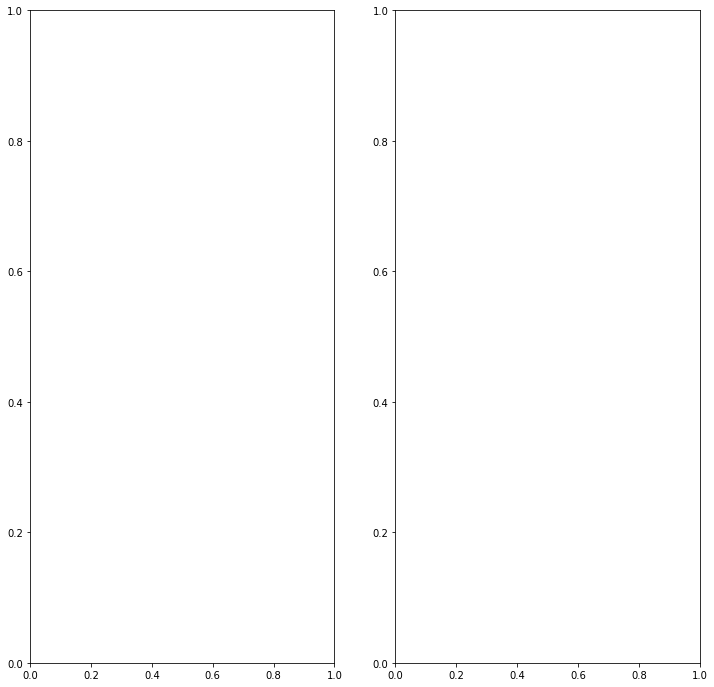

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()